<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
Meep Test: Simulation of Diffraction from perfectly conducting Half-plane
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>April, 2025</font></center>

***

In [1]:
import matplotlib.pyplot as plt
import meep as mp
import numpy as np

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

Using MPI version 3.1, 1 processes


In [2]:
# Simulation parameters
wavelength = 1.0  # unit length
resolution = 50   # pixels per wavelength
cell_size = mp.Vector3(12*wavelength, 15*wavelength, 0)  # 6λ x 4λ x 0 (2D)
pml_layers = [mp.PML(1.0)]  # 1 wavelength thick PML

In [3]:
# Define the PEC boundary (infinite thin)
pec = mp.Medium(epsilon=1.0, D_conductivity=1e10)  # High conductivity for PEC
geometry = [mp.Block(center=mp.Vector3(3*wavelength, 0, 0),
                    size=mp.Vector3(6*wavelength, 0.1*wavelength, mp.inf),
                    material=pec)]

In [4]:
# Source parameters - plane wave from y direction
source_pos = mp.Vector3(0, 6*wavelength, 0)
source_size = mp.Vector3(12*wavelength, 0, 0)
source = mp.Source(mp.ContinuousSource(frequency=1.0/wavelength),
                  component=mp.Ez,
                  center=source_pos,
                  size=source_size)

In [5]:
# Create simulation
sim = mp.Simulation(cell_size=cell_size,
                   boundary_layers=pml_layers,
                   geometry=geometry,
                   sources=[source],
                   resolution=resolution)

In [6]:
# Run simulation until steady state
sim.run(until=50)  # Run for 50 time units

-----------
Initializing structure...
time for choose_chunkdivision = 0.000178 s
Working in 2D dimensions.
Computational cell is 12 x 15 x 0 with resolution 50
     block, center = (3,0,0)
          size (6,0.1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.202608 s
time for set_conductivity = 0.006916 s
time for set_conductivity = 0.006892 s
time for set_conductivity = 0.006519 s
-----------


FloatProgress(value=0.0, description='0% done ', max=50.0)

Meep progress: 35.53/50.0 = 71.1% done in 4.0s, 1.6s to go
on time step 3554 (time=35.54), 0.00112595 s/step
run 0 finished at t = 50.0 (5000 timesteps)


In [16]:
# Get field data
ez_data = sim.get_array(center=mp.Vector3(0, -1*wavelength, 0),
                       size=mp.Vector3(10*wavelength, 6*wavelength, 0),
                       component=mp.Ez)

     block, center = (3,0,0)
          size (6,0.1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


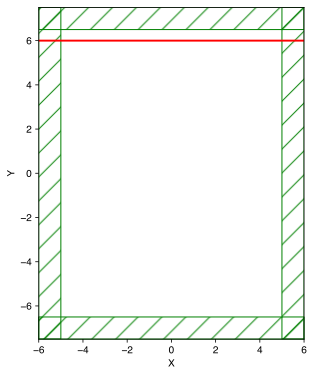

In [17]:
plt.figure(figsize=(8, 6))
sim.plot2D()
plt.show()

In [32]:
Ez2 = np.abs(ez_data.T)**2
Ez2.shape

(302, 502)

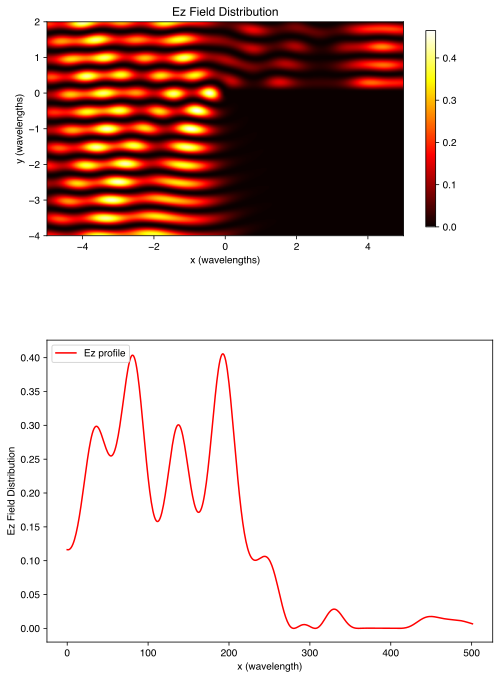

In [33]:
# Plot the field distribution
fig, ax = plt.subplots(2, 1, figsize=(8, 6*2))
im0 = ax[0].imshow(Ez2, 
               extent=[-5,5,-4,2],
               origin='lower',  
               aspect='auto',
               interpolation='spline36',
               cmap='hot', # 'rainbow', 'RdBu', 'RdBu_r', 'coolwarm'
               vmin=0) 
ax[0].set_aspect('equal')
plt.colorbar(im0, shrink=0.65)
ax[0].set_xlabel('x (wavelengths)')
ax[0].set_ylabel('y (wavelengths)')
ax[0].set_title('Ez Field Distribution')


ax[1].plot(
    Ez2[251,:],
    color="red",
    label="Ez profile",
)
ax[1].set_xlabel("x (wavelength)")
ax[1].set_ylabel("Ez Field Distribution")
# ax[1].set_xlim([eps_x_array.min() * 1e3, eps_x_array.max() * 1e3])
# ax[1][1].set_ylim([-1.1, 1.1])
ax[1].legend(loc=2)
# ax[1].grid(linestyle="--")

plt.show() 